## Trabalho Pós IESB - Especialização em Inteligência Artificial

Professora Tatiana Tavares

Alunos : Pedro Caiafa Marques & Tomás Rosário Rosemberg


## Input variables:
### [bank client data](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing):

1. age (numeric)
2. job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3.marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4.education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5.default: has credit in default? (categorical: 'no','yes','unknown')
6.housing: has housing loan? (categorical: 'no','yes','unknown')
7.loan: has personal loan? (categorical: 'no','yes','unknown')

### related with the last contact of the current campaign:

8. contact: contact communication type (categorical: 'cellular','telephone')
9. month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10. day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11. duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model. (Removido)

### other attributes:

12. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14. previous: number of contacts performed before this campaign and for this client (numeric)
15. poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

Output variable (desired target):

16. y - has the client subscribed a term deposit? (binary: 'yes','no')



In [1]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import os
import seaborn as sns
from pandas.plotting import table
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder,LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
dataset = pd.read_csv('data/bank-full.csv',sep=';')
dataset.drop(columns='duration',inplace=True)

In [4]:
print(dataset.shape)
dataset.head()

(45211, 16)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,1,-1,0,unknown,no


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  campaign   45211 non-null  int64 
 12  pdays      45211 non-null  int64 
 13  previous   45211 non-null  int64 
 14  poutcome   45211 non-null  object
 15  y          45211 non-null  object
dtypes: int64(6), object(10)
memory usage: 5.5+ MB


In [6]:
## como podemos ver, não possuimos valores nulos nesse dataset. Conforme a documentação, possiveis valores que seriam nulos estão mapeados como 'unknown'
dataset.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

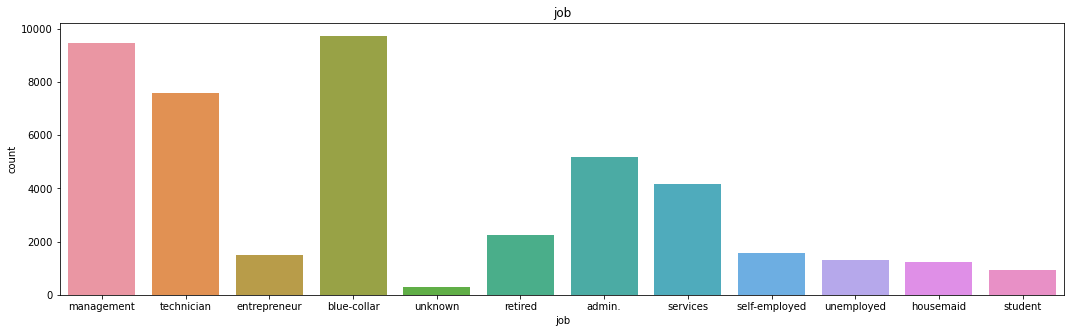

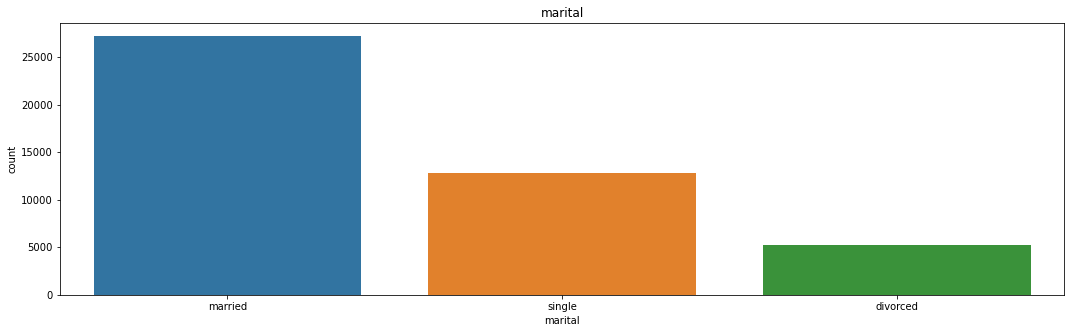

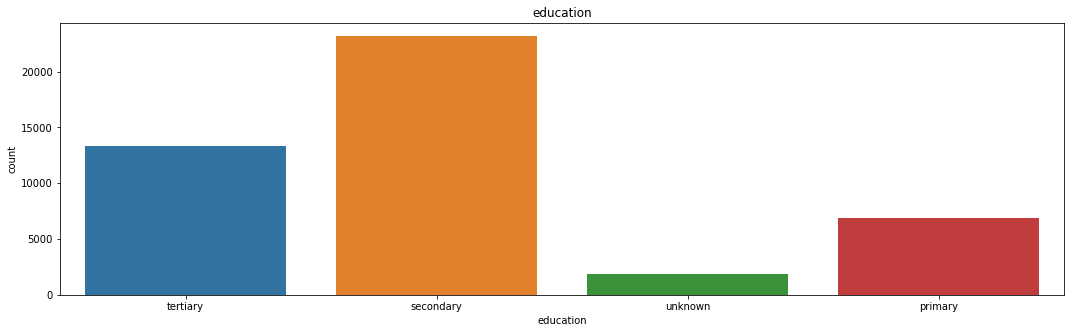

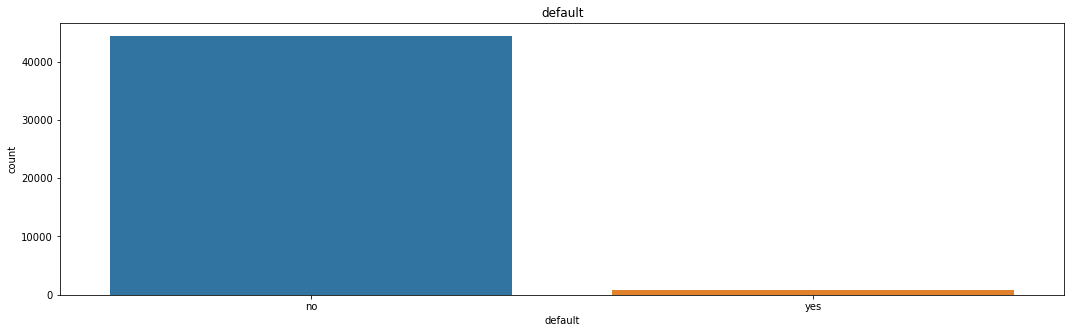

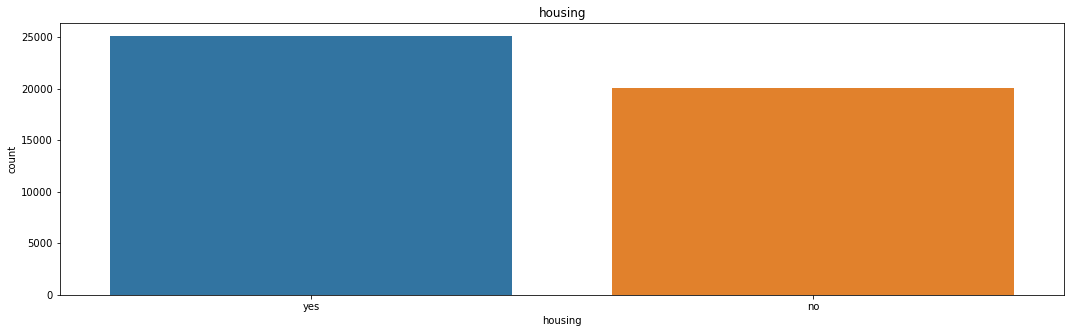

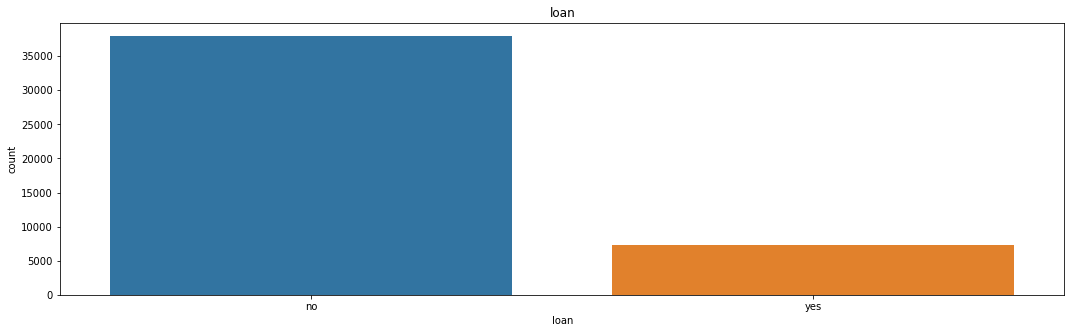

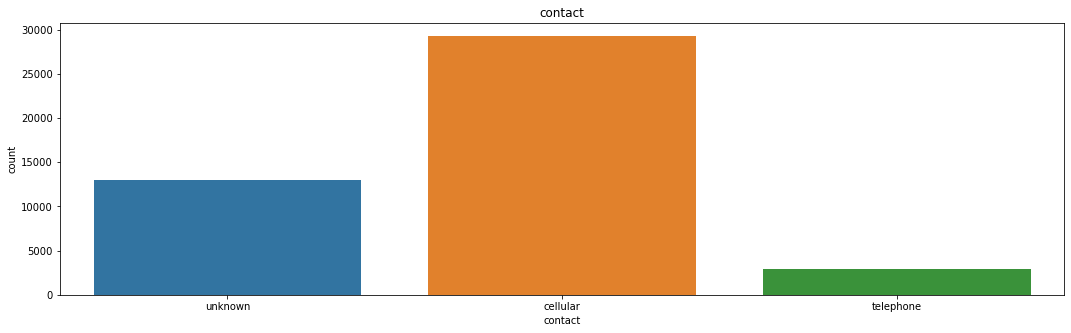

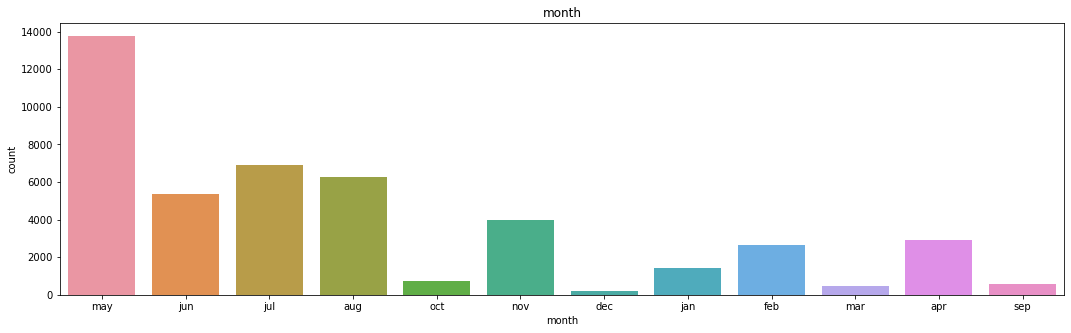

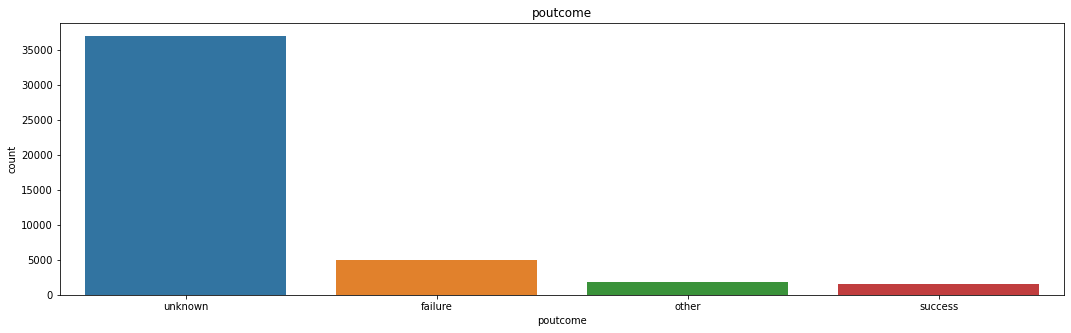

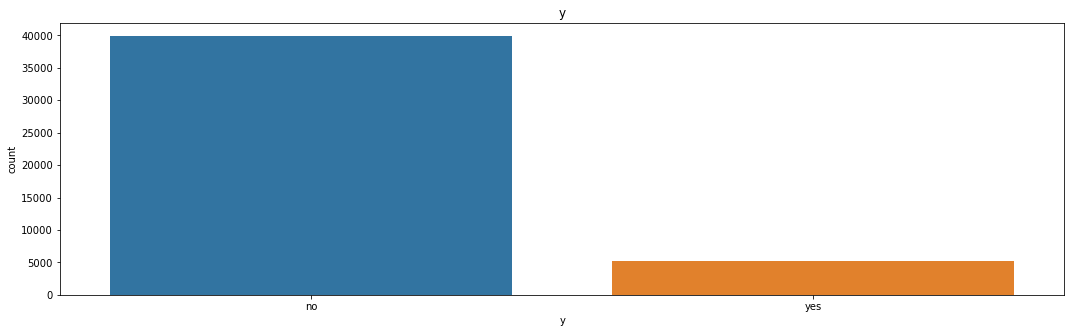

In [7]:
for column in dataset.columns:
    if dataset[column].dtype == np.dtype('O'):
        fig, ax = plt.subplots(figsize=(18,5))
        ax.set_title(column)
        sns.countplot(x=column, data=dataset)

In [8]:
def prepare_dataset(dataset):
    dataset = dataset.values
    X = dataset [:,:-1]
    y = dataset[:,-1]
    y.reshape(len(y),1)
    return X,y

def separe_dataset(X,y,test_size = 0.2):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=1)
    return X_train, X_test, y_train, y_test

def prepare_inputs(X_train, X_test):
    ohe = OneHotEncoder(handle_unknown='ignore')
    ohe.fit(X_train)
    X_train_enc = ohe.transform(X_train)
    X_test_enc = ohe.transform(X_test)
    return X_train_enc, X_test_enc
 
def prepare_labels(y_train, y_test):
    le = LabelEncoder()
    le.fit(y_train)
    y_train_enc = le.transform(y_train)
    y_test_enc = le.transform(y_test)
    return y_train_enc, y_test_enc


In [9]:
dataset = pd.read_csv('data/bank-full.csv',sep=';')
dataset.drop(columns='duration',inplace=True)
X,y = prepare_dataset(dataset)
X_train, X_test, y_train, y_test = separe_dataset(X,y,test_size = 0.2)
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
y_train_enc, y_test_enc = prepare_labels(y_train, y_test)

In [10]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, input_dim=X_train_enc.shape[1], activation='relu', kernel_initializer='he_normal'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_enc, y_train_enc, epochs=50, batch_size=1000, verbose=2)
_, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50
37/37 - 0s - loss: 0.4558 - accuracy: 0.8828
Epoch 2/50
37/37 - 0s - loss: 0.3359 - accuracy: 0.8828
Epoch 3/50
37/37 - 0s - loss: 0.3191 - accuracy: 0.8828
Epoch 4/50
37/37 - 0s - loss: 0.3075 - accuracy: 0.8843
Epoch 5/50
37/37 - 0s - loss: 0.2987 - accuracy: 0.8896
Epoch 6/50
37/37 - 0s - loss: 0.2915 - accuracy: 0.8928
Epoch 7/50
37/37 - 0s - loss: 0.2854 - accuracy: 0.8949
Epoch 8/50
37/37 - 0s - loss: 0.2804 - accuracy: 0.8962
Epoch 9/50
37/37 - 0s - loss: 0.2758 - accuracy: 0.8979
Epoch 10/50
37/37 - 0s - loss: 0.2718 - accuracy: 0.8993
Epoch 11/50
37/37 - 0s - loss: 0.2682 - accuracy: 0.9000
Epoch 12/50
37/37 - 0s - loss: 0.2646 - accuracy: 0.9008
Epoch 13/50
37/37 - 0s - loss: 0.2612 - accuracy: 0.9016
Epoch 14/50
37/37 - 0s - loss: 0.2579 - accuracy: 0.9021
Epoch 15/50
37/37 - 0s - loss: 0.2546 - accuracy: 0.9030
Epoch 16/50
37/37 - 0s - loss: 0.2515 - accuracy: 0.9040
Epoch 17/50
37/37 - 0s - loss: 0.2482 - accuracy: 0.9049
Epoch 18/50
37/37 - 0s - loss: 0.2450 - 

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, input_dim=X_train_enc.shape[1], activation='relu'))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_enc, y_train_enc, epochs=50, batch_size=1000, verbose=2)
_, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50
37/37 - 0s - loss: 0.4985 - accuracy: 0.8355
Epoch 2/50
37/37 - 0s - loss: 0.3374 - accuracy: 0.8828
Epoch 3/50
37/37 - 0s - loss: 0.3171 - accuracy: 0.8828
Epoch 4/50
37/37 - 0s - loss: 0.3029 - accuracy: 0.8848
Epoch 5/50
37/37 - 0s - loss: 0.2906 - accuracy: 0.8944
Epoch 6/50
37/37 - 0s - loss: 0.2800 - accuracy: 0.8972
Epoch 7/50
37/37 - 0s - loss: 0.2713 - accuracy: 0.8993
Epoch 8/50
37/37 - 0s - loss: 0.2631 - accuracy: 0.9016
Epoch 9/50
37/37 - 0s - loss: 0.2544 - accuracy: 0.9043
Epoch 10/50
37/37 - 0s - loss: 0.2453 - accuracy: 0.9067
Epoch 11/50
37/37 - 0s - loss: 0.2363 - accuracy: 0.9094
Epoch 12/50
37/37 - 0s - loss: 0.2275 - accuracy: 0.9130
Epoch 13/50
37/37 - 0s - loss: 0.2201 - accuracy: 0.9156
Epoch 14/50
37/37 - 0s - loss: 0.2120 - accuracy: 0.9194
Epoch 15/50
37/37 - 0s - loss: 0.2054 - accuracy: 0.9222
Epoch 16/50
37/37 - 0s - loss: 0.1988 - accuracy: 0.9252
Epoch 17/50
37/37 - 0s - loss: 0.1938 - accuracy: 0.9272
Epoch 18/50
37/37 - 0s - loss: 0.1877 - 

In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(20, input_dim=X_train_enc.shape[1], activation='relu'))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_enc, y_train_enc, epochs=50, batch_size=1000, verbose=2)
_, accuracy = model.evaluate(X_test_enc, y_test_enc, verbose=0)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/50
37/37 - 0s - loss: 0.4794 - accuracy: 0.8504
Epoch 2/50
37/37 - 0s - loss: 0.3336 - accuracy: 0.8828
Epoch 3/50
37/37 - 0s - loss: 0.3134 - accuracy: 0.8828
Epoch 4/50
37/37 - 0s - loss: 0.2986 - accuracy: 0.8887
Epoch 5/50
37/37 - 0s - loss: 0.2861 - accuracy: 0.8950
Epoch 6/50
37/37 - 0s - loss: 0.2773 - accuracy: 0.8972
Epoch 7/50
37/37 - 0s - loss: 0.2700 - accuracy: 0.8992
Epoch 8/50
37/37 - 0s - loss: 0.2636 - accuracy: 0.9007
Epoch 9/50
37/37 - 0s - loss: 0.2571 - accuracy: 0.9021
Epoch 10/50
37/37 - 0s - loss: 0.2506 - accuracy: 0.9030
Epoch 11/50
37/37 - 0s - loss: 0.2443 - accuracy: 0.9060
Epoch 12/50
37/37 - 0s - loss: 0.2378 - accuracy: 0.9083
Epoch 13/50
37/37 - 0s - loss: 0.2313 - accuracy: 0.9104
Epoch 14/50
37/37 - 0s - loss: 0.2251 - accuracy: 0.9127
Epoch 15/50
37/37 - 0s - loss: 0.2185 - accuracy: 0.9158
Epoch 16/50
37/37 - 0s - loss: 0.2124 - accuracy: 0.9199
Epoch 17/50
37/37 - 0s - loss: 0.2056 - accuracy: 0.9237
Epoch 18/50
37/37 - 0s - loss: 0.1997 - 